1.. Find the census trck shape files online (American Fact Finder has them), http://www1.nyc.gov/ has them. The folder you should download is names nycb2010_16d. Load it as a geopandas file


In [46]:
import os 
import geopandas as gp
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from fiona.crs import from_epsg
from shapely.geometry import Point

In [31]:
path = os.getenv("PUIDATA") + "/nycb2010.shp"
ny_shape = gp.GeoDataFrame.from_file(path)

In [34]:
ny_shape.crs = from_epsg(2263)

In [35]:
# a view of the shape file loaded as a geojson file will look like this. Notice the coordinates. They are in 
# epsg=2263 is US feet. You want to convert them in epsg=4326: lat/on . 
# Look at the notebook https://github.com/fedhere/PUI2016_fb55/blob/master/Lab9_SRK325/GeospatialAnalysis_CitiBike.ipynb
nyc_shape=ny_shape.to_crs(epsg=4326)

In [39]:
nyc_shape.BoroName.unique()

array([u'Staten Island', u'Manhattan', u'Brooklyn', u'Bronx', u'Queens'], dtype=object)

In [50]:
bk_latlon = nyc_shape[nyc_shape['BoroName'] == 'Brooklyn']

In [51]:
bk_latlon.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
5236,30002001000,3,Brooklyn,1000,000200,208484.989566,2097.493132,POLYGON ((-74.00659158337982 40.65561273365177...
5237,30003011000,3,Brooklyn,1000,000301,63365.958361,1006.913933,POLYGON ((-73.99514512602698 40.69877384567195...
5238,30005011000,3,Brooklyn,1000,000501,116303.194723,1431.900698,POLYGON ((-73.99270830309769 40.69809925981344...
5239,30005021000,3,Brooklyn,1000,000502,229422.302690,2161.470041,POLYGON ((-73.99136812163775 40.69701375273571...
5240,30011001000,3,Brooklyn,1000,001100,54802.306859,951.657541,POLYGON ((-73.98514306089652 40.69488514296981...


3.. Find the coordinates of CUSP: 1 MetroTech Brooklyn. Create a Point shapely geometry with the coordinates of CUSP

In [68]:
cusp = Point(-73.9885938, 40.6932201)

4.. Loop over the Brookly polygons (nearly 10000) and assess find in which geometry the polygon is contained

In [69]:

# you will need to use 
# - ct_latlon.geometry (the polygons you are looping over)
# - shapely.geometry.asShape(<the polygon>).contain(<the point>)

bk_latlon[bk_latlon.geometry.contains(cusp)].geometry


36250    POLYGON ((-73.98716132813911 40.69496169586319...
Name: geometry, dtype: object

5.. Plot one every 10 polygons of brooklyn (using the geopandas datafame method plot) and overplot the locati`on of cusp as a point (using pylab.scatter) Overplot also the census track that contains cusp in red (using the geopandas datafame method plot)


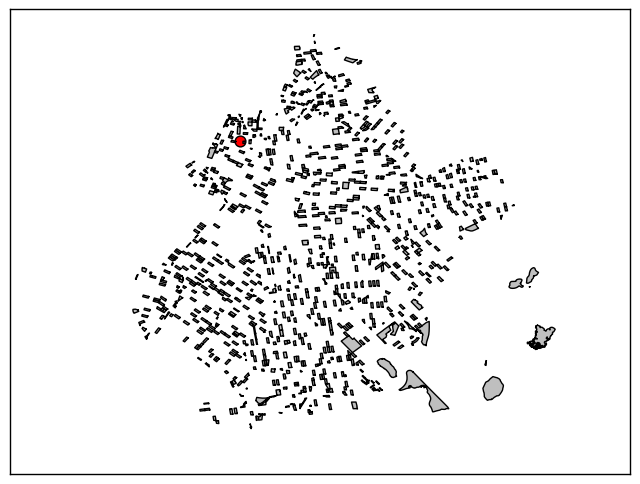

In [72]:
fig, ax = plt.subplots(figsize=(8,6))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
bk_latlon[::10].plot(ax=ax, color="grey")
ax.scatter(-73.9885938,40.6932201, c = 'red', s =60)
